<a href="https://colab.research.google.com/github/u1353279/DEEP-LEARNING/blob/master/DropOut%26BatcchNoMalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 501kB 53.0MB/s 
     |████████████████████████████████| 4.3MB 41.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 35.16 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [5]:
test_data_dir='/content/dog-cat-full-dataset/data/test'
train_data_dir='/content/dog-cat-full-dataset/data/train'

In [6]:
img_width=32
img_height=32
batch_size=20

In [7]:
datagen=ImageDataGenerator(rescale=1./255)

In [8]:
train_generator= datagen.flow_from_directory(directory=train_data_dir,target_size=(img_width,img_height),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
validation_generator=datagen.flow_from_directory(directory=test_data_dir,target_size=(img_width,img_height),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [12]:
len(train_generator)

1000

Build first CNN base model

In [13]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 106s 106ms/step - loss: 0.3877 - accuracy: 0.8237 - val_loss: 0.5786 - val_accuracy: 0.7310
Epoch 2/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.3406 - accuracy: 0.8501 - val_loss: 0.5946 - val_accuracy: 0.7374
Epoch 3/5
1000/1000 [==============================] - 103s 103ms/step - loss: 0.2831 - accuracy: 0.8781 - val_loss: 0.6845 - val_accuracy: 0.7382
Epoch 4/5
1000/1000 [==============================] - 103s 103ms/step - loss: 0.2285 - accuracy: 0.9038 - val_loss: 0.6938 - val_accuracy: 0.7386
Epoch 5/5
1000/1000 [==============================] - 103s 103ms/step - loss: 0.1866 - accuracy: 0.9256 - val_loss: 0.8351 - val_accuracy: 0.7074


In [25]:
history.history

{'accuracy': [0.82365, 0.8501, 0.8781, 0.90375, 0.9256],
 'loss': [0.3877101593837142,
  0.3406061017885804,
  0.2831162193343043,
  0.22848527240753175,
  0.1866314387973398],
 'val_accuracy': [0.731, 0.7374, 0.7382, 0.7386, 0.7074],
 'val_loss': [0.5786464577317237,
  0.5945752277970314,
  0.684508449614048,
  0.6938246360421181,
  0.8351094499230385]}

In [26]:
def plot_learningCurve(history):
  #plot training and validation accuracy values
  epoch_range=range(1,6)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  #plot training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

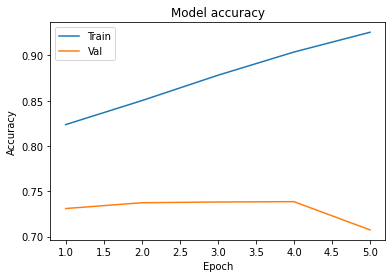

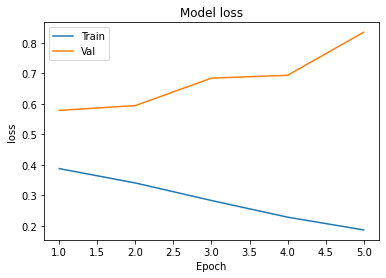

In [27]:
plot_learningCurve(history)

ImpleMent first 3 layers of VGG16

In [28]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

#SECOND BLOCK
model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

#THIRD BLOCK
model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 187s 187ms/step - loss: 7.6604 - accuracy: 0.4961 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 187s 187ms/step - loss: 7.6666 - accuracy: 0.5038 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 192s 192ms/step - loss: 7.6666 - accuracy: 0.4993 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 193s 193ms/step - loss: 7.6666 - accuracy: 0.4987 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 192s 192ms/step - loss: 7.6666 - accuracy: 0.5006 - val_loss: 7.6666 - val_accuracy: 0.5000


The model is performing as a random classifier

Bathch NorMalisation and dropout

In [31]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
#SECOND BLOCK
model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

#THIRD BLOCK
model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [32]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/10
1000/1000 [==============================] - 290s 290ms/step - loss: 0.6806 - accuracy: 0.6014 - val_loss: 0.5879 - val_accuracy: 0.6942
Epoch 2/10
1000/1000 [==============================] - 289s 289ms/step - loss: 0.5990 - accuracy: 0.6892 - val_loss: 0.6486 - val_accuracy: 0.6688
Epoch 3/10
1000/1000 [==============================] - 290s 290ms/step - loss: 0.5599 - accuracy: 0.7112 - val_loss: 0.5433 - val_accuracy: 0.7296
Epoch 4/10
1000/1000 [==============================] - 290s 290ms/step - loss: 0.5378 - accuracy: 0.7400 - val_loss: 0.5165 - val_accuracy: 0.7462
Epoch 5/10
1000/1000 [==============================] - 290s 290ms/step - loss: 0.5173 - accuracy: 0.7459 - val_loss: 0.5131 - val_accuracy: 0.7482
Epoch 6/10
1000/1000 [==============================] - 288s 288ms/step - loss: 0.5030 - accuracy: 0.7535 - val_loss: 0.4988 - val_accuracy: 0.7686
Epoch 7/10
1000/1000 [==============================] - 288s 288ms/step - loss: 0.4912 - accuracy: 0.7655 - val_

In [36]:
def plot_learningCurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  #plot training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

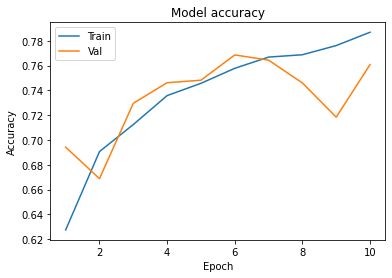

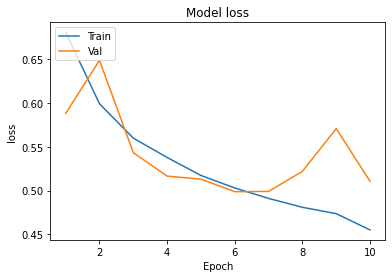

In [37]:
plot_learningCurve(history,10)

We can identify that at epch 7 we need to stop training as the Model starts to overFit